In [84]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Web Scraping

Faz a coleta de dados em sites específicos, gerando importante insights ao negócio.
Pode ter benefícios, como economia de tempo e esforço, coleta feita de fontes precisas, entre outros. No entanto, deve se ter cuidado com os dados coletados e o seu uso. Por isso, foi aprovada a LGPD.

1. LGPD (Lei Geral de Proteção de Dados)

Tem como função padronizar regulamentos e práticas referentes a como os dados brasileiros são coletados, tratados, armazenados e protegidos e estabelece punições pelo descumprimento em casos de irregularidades, como vazamentos.

In [15]:
link = 'https://news.google.com/search?for=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
page = requests.get(link)
page

<Response [200]>

- Beautiful soup

Biblioteca python que facilita a extração de dados nos documentos html e xml.

In [3]:
sample = BeautifulSoup(page.text, 'html.parser')

In [4]:
# escrito dentro da tag title
sample.title.string

'Google Notícias - Pesquisar'

In [5]:
# qual a tag desta classe
sample.find(class_='pGxpHc').name

'div'

In [6]:
sample.find(class_='cp7Yvc').string

'Americanas revisa lista de credores'

In [7]:
# quantidade de tag div nos textos
len(sample.find_all('div'))

1422

- Web scraping na prática

In [8]:
def search(item):
    url = f'https://news.google.com/search?for={item}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
    found = requests.get(url)
    
    text_html = found.text
    
    scraper = BeautifulSoup(text_html, 'html.parser')
    
    return scraper

In [79]:
df = search('futebol')

elements = df.find_all('h3')

In [80]:
# busca os textos osbre o assunto
news = [script.get_text() for script in elements]
print(len(news))

104


In [81]:
print("Primeiras 20 notícias: ")
print("----------------------")
for n, loop in enumerate(news[0:20]):
    print(loop)

Primeiras 20 notícias: 
----------------------
Terremoto na Turquia: Atsu, ex-Chelsea e Porto, é encontrado morto
Terremoto na Turquia: jogador de futebol é encontrado morto
Primeira partida de futebol na Turquia após terremoto é marcada por homenagens; veja imagens
Jogos de futebol hoje, sábado, 18; onde assistir ao vivo e horários
Jogos de futebol ao vivo na TV e streaming de 18 a 20 de fevereiro de 2023
Jogos hoje (18/02/23) ao vivo de futebol: onde assistir e horário
Haaland revela quem é seu maior ídolo no mundo do futebol
Goleiro cai de cara na bola e acaba expulso em jogo do Liverpool; assista
Manipulação na Série B: conversas mostram que Romário recebeu dinheiro pago por apostadores
Marcelo rescinde com Olympiacos após menos de seis meses no clube
Vasco acerta a contratação de um dos principais artilheiros do futebol brasileiro na temporada
'Jatinho do asfalto' é a nova moda entre jogadores de futebol
Sem acerto com Cuéllar, Inter negocia contratação de volante destaque do fute

In [82]:
mingle = ''

for loop in news:
    breakg = loop.split()
    for word in breakg:
        mingle = mingle + '' + word

In [ ]:
# stopwords usando nltk

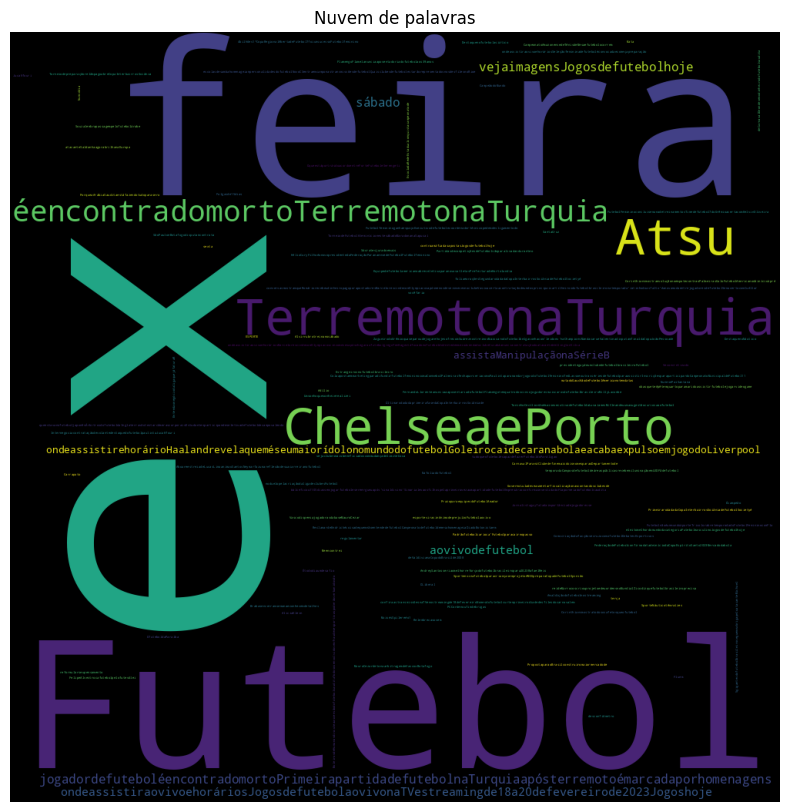

In [86]:
cloud = WordCloud(
    width = 1000,
    height = 1000,
    max_words = 500,
    stopwords = ['o', 'de', 'da', 'em', 'que', 'e', 'a', 'das', 'não', 'dos', 'sobre', 'é', 'na', 'com', 'Por', 'as', 'os', 'como', 'do', 'para', 'no', 'à', 'R', 'se']
).generate(mingle)

figurine, size = plt.subplots(figsize=(12, 10))
plt.title('Nuvem de palavras')
size.imshow(cloud)
size.set_axis_off()